In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np

from data_loader import data_loader
from gain import gain
from utils import rmse_loss

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
miss_rate=0.2 
gain_parameters = {'batch_size': 128,
                   'hint_rate': 0.9,
                   'alpha': 100,
                   'iterations': 10000}

In [3]:
ori_data_x, miss_data_x, data_m = data_loader("letter", miss_rate)

In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ori_data_x

array([[ 2.,  8.,  3., ...,  8.,  0.,  8.],
       [ 5., 12.,  3., ...,  8.,  4., 10.],
       [ 4., 11.,  6., ...,  7.,  3.,  9.],
       ...,
       [ 6.,  9.,  6., ..., 12.,  2.,  4.],
       [ 2.,  3.,  4., ...,  9.,  5.,  8.],
       [ 4.,  9.,  6., ...,  7.,  2.,  8.]])

In [6]:
miss_data_x

array([[ 2.,  8.,  3., ..., nan,  0., nan],
       [ 5., 12., nan, ...,  8.,  4., 10.],
       [ 4., nan,  6., ..., nan,  3.,  9.],
       ...,
       [ 6.,  9.,  6., ..., 12.,  2., nan],
       [ 2.,  3.,  4., ...,  9.,  5.,  8.],
       [ 4.,  9.,  6., ...,  7.,  2.,  8.]])

In [7]:
data_m

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [8]:
imputed_data_x = gain(miss_data_x, gain_parameters)


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 803.75it/s]


In [9]:
imputed_data_x

array([[ 2.,  8.,  3., ..., 11.,  0.,  9.],
       [ 5., 12.,  6., ...,  8.,  4., 10.],
       [ 4.,  9.,  6., ...,  7.,  3.,  9.],
       ...,
       [ 6.,  9.,  6., ..., 12.,  2.,  7.],
       [ 2.,  3.,  4., ...,  9.,  5.,  8.],
       [ 4.,  9.,  6., ...,  7.,  2.,  8.]])

In [10]:
col_names=[]
for i in range(ori_data_x.shape[1]):
    col_names.append("col_"+str(i))

In [11]:
data_df = pd.DataFrame(data=ori_data_x,columns=col_names)
data_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15
0,2.0,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,5.0,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,4.0,11.0,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,7.0,11.0,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,2.0,8.0
4,2.0,1.0,3.0,1.0,1.0,8.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0


In [12]:
miss_data_df = pd.DataFrame(data=miss_data_x,columns=col_names)
miss_data_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15
0,2.0,8.0,3.0,5.0,NaN,NaN,13.0,0.0,6.0,6.0,NaN,8.0,0.0,NaN,0.0,NaN
1,5.0,12.0,NaN,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,NaN,8.0,4.0,10.0
2,4.0,NaN,6.0,8.0,6.0,10.0,6.0,NaN,6.0,10.0,3.0,7.0,3.0,NaN,3.0,9.0
3,7.0,11.0,6.0,6.0,3.0,NaN,9.0,NaN,NaN,4.0,4.0,NaN,6.0,10.0,2.0,8.0
4,2.0,NaN,3.0,NaN,1.0,NaN,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0


In [13]:
imputed_data_df = pd.DataFrame(data=imputed_data_x,columns=col_names)
imputed_data_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15
0,2.0,8.0,3.0,5.0,2.0,6.0,13.0,0.0,6.0,6.0,8.0,8.0,0.0,11.0,0.0,9.0
1,5.0,12.0,6.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,4.0,9.0,6.0,8.0,6.0,10.0,6.0,4.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,7.0,11.0,6.0,6.0,3.0,6.0,9.0,4.0,4.0,4.0,4.0,7.0,6.0,10.0,2.0,8.0
4,2.0,7.0,3.0,5.0,1.0,7.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0


In [14]:
miss_index = miss_data_df[miss_data_df.col_0.isna()].index

In [15]:
miss_index = list(miss_index)

In [16]:
impt_data = imputed_data_df.col_0[miss_index].astype(int)
data = data_df.col_0[miss_index].astype(int)

In [17]:
from matplotlib.pyplot import figure


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cf_matrix = confusion_matrix(data, impt_data)

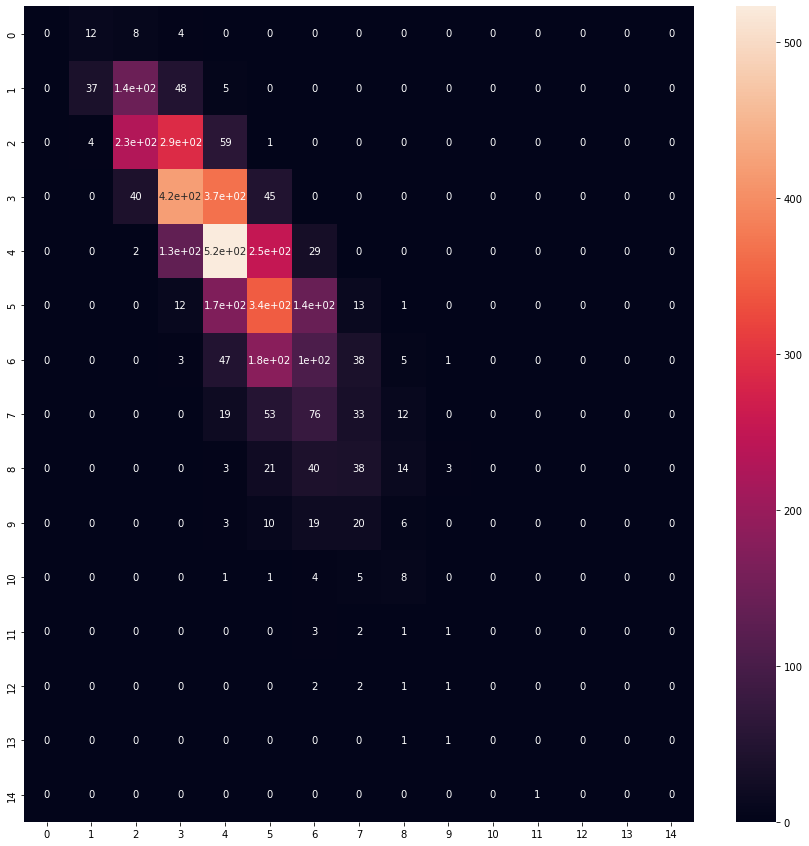

In [20]:
figure(figsize=(15, 15))
sn.heatmap(cf_matrix, annot=True);

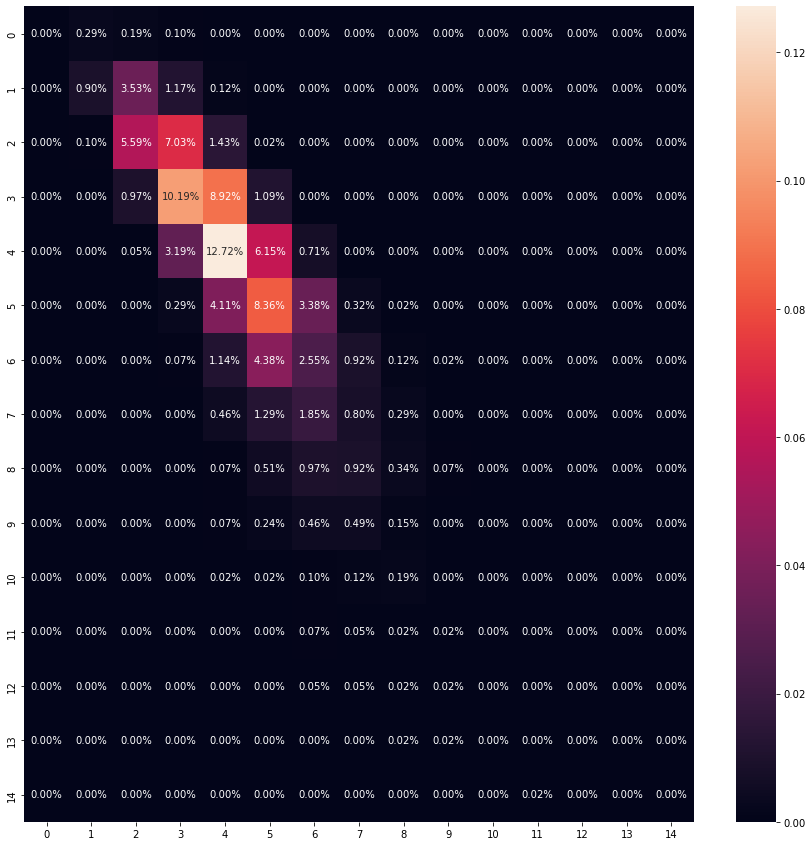

In [21]:
figure(figsize=(15, 15))
sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%');